In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Position_Salaries.csv")

In [3]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
len(df['Position'].unique())

10

In [5]:
df=df.drop(['Position'],axis=1)

In [6]:
df

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [7]:
df.info

<bound method DataFrame.info of    Level   Salary
0      1    45000
1      2    50000
2      3    60000
3      4    80000
4      5   110000
5      6   150000
6      7   200000
7      8   300000
8      9   500000
9     10  1000000>

In [8]:
df.isnull().sum()

Level     0
Salary    0
dtype: int64

In [9]:
df.shape

(10, 2)

## Simple Linear Regression

In [11]:
x=df.drop(['Salary'],axis=1)
y=df['Salary']

In [12]:
x.head()

,Level
0,1
1,2
2,3
3,4
4,5


In [13]:
y.head()

0     45000
1     50000
2     60000
3     80000
4    110000
Name: Salary, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=11)

In [17]:
x_train

,Level
4,5
5,6
1,2
3,4
0,1
9,10


In [18]:
y_train

4     110000
5     150000
1      50000
3      80000
0      45000
9    1000000
Name: Salary, dtype: int64

In [19]:
len(x_train),len(y_train)

(6, 6)

In [20]:
len(x_test),len(y_test)

(4, 4)

In [21]:
from sklearn.linear_model import LinearRegression

In [23]:
reg=LinearRegression()

In [24]:
reg.fit(x_train,y_train)

LinearRegression()

In [26]:
reg.coef_

array([101655.84415584])

In [27]:
reg.intercept_

-235227.27272727285

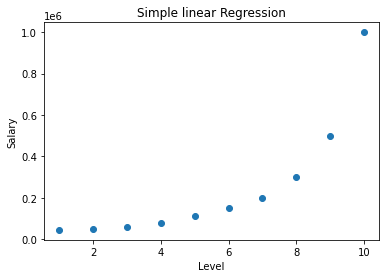

In [29]:
plt.title("Simple linear Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.scatter(x,y)
plt.show()

In [30]:
y_train_pred=reg.predict(x_train)

In [36]:
y_train_pred

array([ 273051.94805195,  374707.79220779,  -31915.58441558,
        171396.1038961 , -133571.42857143,  781331.16883117])

In [43]:
y_test_pred=reg.predict(x_test)

In [44]:
y_test

7    300000
8    500000
2     60000
6    200000
Name: Salary, dtype: int64

In [37]:
a=pd.DataFrame({"Actual point" : y_train , "Predicted Point" : y_train_pred})

In [38]:
a

,Actual point,Predicted Point
4,110000,273051.948052
5,150000,374707.792208
1,50000,-31915.584416
3,80000,171396.103896
0,45000,-133571.428571
9,1000000,781331.168831


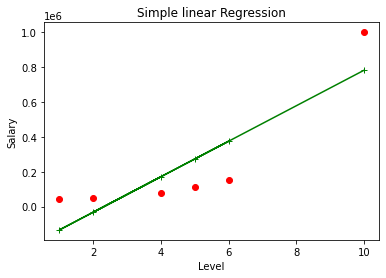

In [39]:
plt.title("Simple linear Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.scatter(x_train,y_train,color='r',marker='o')
plt.plot(x_train,y_train_pred,color='g',marker='+')
plt.show()

In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_score(y_train,y_train_pred)*100

75.53158825844031

In [45]:
r2_score(y_test,y_test_pred)*100

-81.15850633831074

# Polinomial Linear Regression

In [49]:
from sklearn.preprocessing import PolynomialFeatures

In [50]:
poly = PolynomialFeatures(degree=2)

In [51]:
x_train

,Level
4,5
5,6
1,2
3,4
0,1
9,10


In [52]:
x_train = poly.fit_transform(x_train)

In [53]:
x_train

array([[  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   2.,   4.],
       [  1.,   4.,  16.],
       [  1.,   1.,   1.],
       [  1.,  10., 100.]])

In [55]:
x_test = poly.fit_transform(x_test)

In [56]:
x_test

array([[ 1.,  8., 64.],
       [ 1.,  9., 81.],
       [ 1.,  3.,  9.],
       [ 1.,  7., 49.]])

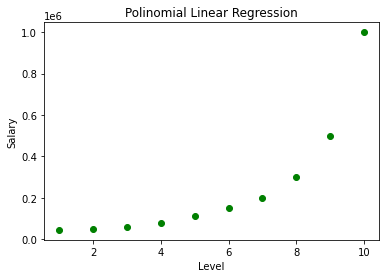

In [58]:
plt.title("Polinomial Linear Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.scatter(x , y , color='g',marker='o')

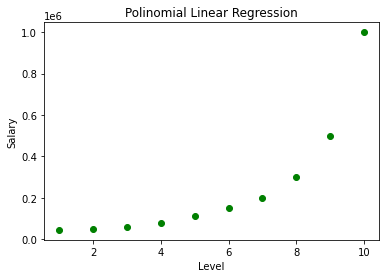

In [62]:
plt.title("Polinomial Linear Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.scatter(x , y , color='g',marker='o')
#plt.plot(x_train ,y_train_pred , color='b',maker='+')

In [66]:
x_train

array([[  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   2.,   4.],
       [  1.,   4.,  16.],
       [  1.,   1.,   1.],
       [  1.,  10., 100.]])

In [67]:
y_train

4     110000
5     150000
1      50000
3      80000
0      45000
9    1000000
Name: Salary, dtype: int64

In [68]:
x_test

array([[ 1.,  8., 64.],
       [ 1.,  9., 81.],
       [ 1.,  3.,  9.],
       [ 1.,  7., 49.]])

In [69]:
y_test

7    300000
8    500000
2     60000
6    200000
Name: Salary, dtype: int64

In [70]:
reg.fit(x_train,y_train)

LinearRegression()

In [71]:
y_train_pred_poly = reg.predict(x_train)

In [72]:
y_train_pred

array([ 273051.94805195,  374707.79220779,  -31915.58441558,
        171396.1038961 , -133571.42857143,  781331.16883117])

In [83]:
y_test_pred_poly=reg.predict(x_test)

In [84]:
y_test_pred

array([578019.48051948, 679675.32467532,  69740.25974026, 476363.63636364])

In [74]:
a = pd.DataFrame({"Actual": y_train,'predicted': y_train_pred_poly})

In [75]:
a

,Actual,predicted
4,110000,102694.805195
5,150000,204350.649351
1,50000,24870.129870
3,80000,38896.103896
0,45000,74642.857143
9,1000000,989545.454545


In [76]:
y_test_poly=reg.predict(x_test)

In [78]:
x_test

array([[ 1.,  8., 64.],
       [ 1.,  9., 81.],
       [ 1.,  3.,  9.],
       [ 1.,  7., 49.]])

In [79]:
y_test

7    300000
8    500000
2     60000
6    200000
Name: Salary, dtype: int64

In [80]:
r2_score(y_train,y_train_pred_poly)*100

99.10063950774214

In [82]:
r2_score(y_test,y_test_poly)*100

-24.40917519928716

In [85]:
r2_score(y_test,y_test_pred_poly)*100

-24.40917519928716